## From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets


In [6]:
iris=datasets.load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
x=df.iloc[:,:].values

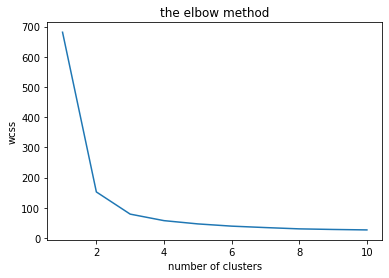

In [31]:
#finding optimium number of clustering for k_means classification

from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
#plotting the graph

plt.plot(range(1,11),wcss)
plt.title("the elbow method")
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.show()

    

### HENCE BY ELBOW METHOD K=3

In [32]:
#applying kmeans classifier to  datasets
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(x)

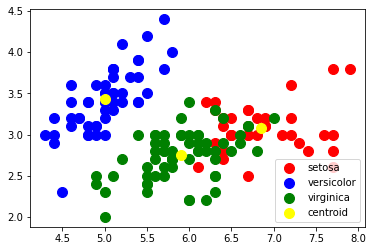

In [34]:
# visualising the clusters on the _first  two column
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='versicolor')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label='virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='centroid')
plt.legend()